In [1]:
import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
def count_oranges(img,counter):
    #Open a simple image
    m=cv2.imread(img)
    img_HSV = cv2.cvtColor(m, cv2.COLOR_BGR2HSV)
    #skin color range for hsv color space 
    HSV_mask = cv2.inRange(img_HSV, (0, 80, 20), (25, 255, 255))
    #HSV_mask = cv2.inRange(img_HSV, (23, 59, 90), (34, 100, 100))
    target = cv2.bitwise_and(m,m, mask=HSV_mask)
    counter+=1
    cv2.imwrite('segmentedoutregion'+str(counter)+'.jpg',target)
    plt.imshow(cv2.cvtColor(m, cv2.COLOR_BGR2RGB))
    plt.imshow(cv2.cvtColor(target, cv2.COLOR_BGR2RGB))
    contours,hierarchy  = cv2.findContours(cv2.cvtColor(target, cv2.COLOR_BGR2GRAY), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    print("Contours: "+str(len(contours)))
    counter+=1
    
        
    bounding_boxes = []
    threshold = 75
    ar=[]
    
    
    imgwithbox = target.copy()
    for c in contours:
        area = cv2.contourArea(c)
        if area >threshold:
            [x,y,w,h]=cv2.boundingRect(c)
            bounding_boxes.append([x,y,w,h])
            print([x,y,w,h])
            area_rect=w*h
            print(area_rect)
            ar.append(area_rect)
            cv2.rectangle(imgwithbox,(x,y),(x+w,y+h),(0,255,0),2)
    cv2.imwrite('orangeswithboundingboxes'+str(counter)+'.jpg',imgwithbox)
    try:
        plt.imshow(imgwithbox)
        print("Yay")
    except:
        print("Nah")
    print(len(bounding_boxes))
    print(ar)
    total_area=sum(ar)
    print(total_area)
    avg_rect=0
    try:
        avg_rect= total_area/len(bounding_boxes)
    except:
        print("Nah")
    print(avg_rect)
    q=np.asarray(ar)
    print(q)
    no_of_oranges = q/avg_rect
    print(no_of_oranges)
    O_MIN = np.array([0, 80, 20], np.uint8)
    O_MAX = np.array([25, 255, 255], np.uint8)

    dst = cv2.inRange(imgwithbox, O_MIN, O_MAX)
    orange_pixel = cv2.countNonZero(dst)
    print('The number of orange pixels is: ' + str(orange_pixel))

    cv2.rectangle(m,(107,470),(107+64,470+30),(0,255,0),2)
    plt.imshow(m)

    cv2.rectangle(m,(558,385),(558+11,385+15),(0,255,0),2)
    plt.imshow(m)
    cv2.rectangle(m,(781,622),(781+14,622+15),(0,255,0),2)
    plt.imshow(m)
    #output = m.copy()
    output = imgwithbox
    #cv2.putText(output, "WELCOME TO PROJECT FRUIT", (10, 25), 

    number_of_oranges_list=[]
    print(no_of_oranges)
    
    for count in enumerate(no_of_oranges):
    #     print(index)
        if count[1]<0.3:
            no_of_oranges[count[0]]=0
        elif count[1]>0.3 and count[1]<1.5:
            no_of_oranges[count[0]]=1
        elif count[1]>1.5 and count[1]<2.5:
            no_of_oranges[count[0]]=2
        elif count[1]>2.5 and count[1]<3.5:
            no_of_oranges[count[0]]=3
    q=np.asarray(ar)
    number_of_oranges_list=[]
    print(q)
    no_of_oranges = q/avg_rect
    print(no_of_oranges)
    rounded_value=np.around(no_of_oranges,0)
    print(rounded_value)
    total_fruits=sum(rounded_value)
    print(total_fruits)     
    fruits=sum(no_of_oranges )
    print(fruits)
    #cv2.putText(output,'OpenCV',(10,500), font, 4,(255,255,255),2,cv2.LINE_AA)
    cv2.putText(output,'OpenCV'+str(int(fruits)), (10, 25),cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
    cv2.imshow("Text", output)
    cv2.imwrite(str(img)+"withcount"+str(counter)+'.jpg', output)
    return counter

Contours: 250
[171, 613, 30, 13]
390
[172, 561, 30, 40]
1200
[409, 544, 65, 167]
10855
[139, 533, 38, 27]
1026
[405, 530, 12, 14]
168
[379, 520, 23, 24]
552
[439, 504, 35, 70]
2450
[404, 481, 43, 29]
1247
[340, 451, 15, 29]
435
[119, 435, 213, 276]
58788
[252, 416, 90, 50]
4500
[394, 376, 44, 88]
3872
[380, 373, 12, 27]
324
[187, 352, 87, 62]
5394
[235, 362, 30, 19]
570
[98, 332, 16, 23]
368
[72, 331, 19, 43]
817
[161, 328, 39, 46]
1794
[326, 323, 50, 42]
2100
[101, 282, 33, 83]
2739
[295, 275, 15, 13]
195
[287, 269, 11, 12]
132
[449, 262, 13, 13]
169
[280, 258, 24, 9]
216
[306, 256, 25, 17]
425
[293, 242, 25, 21]
525
[336, 239, 38, 44]
1672
[307, 235, 13, 14]
182
[143, 230, 56, 52]
2912
[171, 241, 19, 21]
399
[255, 211, 42, 42]
1764
[206, 200, 48, 44]
2112
[213, 177, 27, 22]
594
Yay
33
[390, 1200, 10855, 1026, 168, 552, 2450, 1247, 435, 58788, 4500, 3872, 324, 5394, 570, 368, 817, 1794, 2100, 2739, 195, 132, 169, 216, 425, 525, 1672, 182, 2912, 399, 1764, 2112, 594]
110886
3360.181818

Contours: 54
[171, 288, 17, 28]
476
[8, 271, 46, 30]
1380
[243, 267, 112, 49]
5488
[69, 264, 110, 52]
5720
[54, 228, 27, 38]
1026
[352, 102, 91, 87]
7917
[40, 70, 434, 246]
106764
[96, 4, 14, 33]
462
[73, 0, 20, 32]
640
Yay
9
[476, 1380, 5488, 5720, 1026, 7917, 106764, 462, 640]
129873
14430.333333333334
[   476   1380   5488   5720   1026   7917 106764    462    640]
[0.03298607 0.09563189 0.38031    0.39638724 0.07110023 0.54863598
 7.39858169 0.03201589 0.04435102]
The number of orange pixels is: 32542
[0.03298607 0.09563189 0.38031    0.39638724 0.07110023 0.54863598
 7.39858169 0.03201589 0.04435102]
[   476   1380   5488   5720   1026   7917 106764    462    640]
[0.03298607 0.09563189 0.38031    0.39638724 0.07110023 0.54863598
 7.39858169 0.03201589 0.04435102]
[0. 0. 0. 0. 0. 1. 7. 0. 0.]
8.0
9.0
Contours: 110
[182, 265, 81, 39]
3159
[356, 219, 65, 70]
4550
[70, 217, 17, 14]
238
[388, 170, 26, 14]
364
[75, 113, 272, 152]
41344
[12, 92, 44, 29]
1276
[117, 91, 39, 50]
1950
[432,

[235, 568, 117, 56]
6552
[255, 596, 32, 14]
448
[314, 588, 12, 13]
156
[256, 584, 27, 18]
486
[0, 548, 266, 149]
39634
[153, 632, 16, 19]
304
[180, 629, 28, 12]
336
[91, 624, 29, 33]
957
[45, 620, 29, 29]
841
[63, 619, 16, 17]
272
[24, 618, 12, 21]
252
[34, 616, 11, 26]
286
[171, 614, 24, 13]
312
[112, 614, 29, 24]
696
[13, 608, 19, 20]
380
[171, 604, 26, 13]
338
[145, 594, 35, 45]
1575
[23, 594, 16, 19]
304
[107, 593, 16, 16]
256
[38, 592, 61, 51]
3111
[21, 585, 24, 15]
360
[111, 579, 22, 14]
308
[82, 573, 13, 19]
247
[94, 571, 21, 55]
1155
[232, 474, 25, 25]
625
[137, 454, 23, 23]
529
[131, 356, 130, 203]
26390
[182, 505, 15, 16]
240
[194, 486, 16, 18]
288
[169, 468, 22, 16]
352
[212, 451, 10, 27]
270
[237, 326, 16, 31]
496
[278, 310, 10, 16]
160
[188, 280, 53, 41]
2173
[115, 261, 33, 33]
1089
[98, 260, 15, 16]
240
[291, 253, 17, 15]
255
[200, 245, 13, 19]
247
[299, 244, 20, 13]
260
[322, 240, 21, 17]
357
[225, 239, 46, 39]
1794
[274, 226, 14, 54]
756
[179, 224, 23, 34]
782
[130, 221

Yay
18
[486, 798, 3021, 256, 364, 208, 576, 2100, 208, 567, 272, 300, 182, 132, 289, 684, 143, 182]
10768
598.2222222222222
[ 486  798 3021  256  364  208  576 2100  208  567  272  300  182  132
  289  684  143  182]
[0.81240713 1.33395245 5.04996285 0.42793462 0.60846954 0.34769688
 0.9628529  3.51040119 0.34769688 0.94780832 0.45468053 0.50148588
 0.30423477 0.22065379 0.48309807 1.14338782 0.2390416  0.30423477]
The number of orange pixels is: 371
[0.81240713 1.33395245 5.04996285 0.42793462 0.60846954 0.34769688
 0.9628529  3.51040119 0.34769688 0.94780832 0.45468053 0.50148588
 0.30423477 0.22065379 0.48309807 1.14338782 0.2390416  0.30423477]
[ 486  798 3021  256  364  208  576 2100  208  567  272  300  182  132
  289  684  143  182]
[0.81240713 1.33395245 5.04996285 0.42793462 0.60846954 0.34769688
 0.9628529  3.51040119 0.34769688 0.94780832 0.45468053 0.50148588
 0.30423477 0.22065379 0.48309807 1.14338782 0.2390416  0.30423477]
[1. 1. 5. 0. 1. 0. 1. 4. 0. 1. 0. 1. 0. 0. 0. 1.

[0.23346021 0.39743822 0.68926349 0.42245182 2.0844662  0.3557489
 5.62250015 0.25013594 0.55585765 1.47024349 1.40076128 0.58087125
 1.69258655 0.4377379  0.53362335 0.29182527 0.58087125 0.19871911
 7.78200713 0.21678448 0.35157996 0.76708356 0.21678448 0.27237025
 0.22929128 3.3629388  0.25291523 1.69675548 0.81850039 0.35019032
 1.20621111 0.30711135 0.37520392 0.3432421  1.28403118 0.29182527
 0.3779832  1.16869071 1.24512114 0.25291523 1.88018851 1.28403118
 0.49610295 4.75258293 1.20065253 0.76708356 0.55446801 1.83433025
 0.862969   0.61283306 0.55585765 0.50166153 0.33351459 2.54721769
 0.93800979 2.60141381 0.3557489  0.49610295 1.21454897 0.40160715
 0.33351459 0.3779832  0.64479488 0.3779832  1.08392242 0.39604858
 0.2140052  0.19871911 0.2140052 ]
[ 168  286  496  304 1500  256 4046  180  400 1058 1008  418 1218  315
  384  210  418  143 5600  156  253  552  156  196  165 2420  182 1221
  589  252  868  221  270  247  924  210  272  841  896  182 1353  924
  357 3420  864 

Contours: 541
[52, 254, 14, 12]
168
[381, 252, 78, 12]
936
[320, 246, 60, 20]
1200
[306, 203, 20, 13]
260
[296, 200, 18, 12]
216
[246, 194, 39, 15]
585
[226, 193, 18, 22]
396
[164, 190, 31, 12]
372
[399, 180, 39, 13]
507
[32, 179, 51, 21]
1071
[455, 68, 19, 15]
285
[298, 33, 24, 13]
312
[0, 0, 474, 266]
126084
[5, 245, 20, 9]
180
[279, 235, 14, 12]
168
[252, 227, 18, 9]
162
[149, 219, 23, 14]
322
[126, 202, 37, 17]
629
[337, 126, 16, 13]
208
[312, 119, 14, 14]
196
[362, 117, 55, 35]
1925
[207, 88, 18, 15]
270
[422, 81, 12, 14]
168
[433, 79, 16, 18]
288
[395, 63, 41, 32]
1312
[135, 58, 15, 15]
225
[171, 52, 31, 29]
899
[353, 43, 32, 15]
480
[86, 39, 19, 13]
247
[181, 23, 18, 27]
486
[84, 20, 25, 12]
300
[357, 16, 23, 9]
207
[58, 5, 22, 20]
440
Yay
33
[168, 936, 1200, 260, 216, 585, 396, 372, 507, 1071, 285, 312, 126084, 180, 168, 162, 322, 629, 208, 196, 1925, 270, 168, 288, 1312, 225, 899, 480, 247, 486, 300, 207, 440]
141504
4288.0
[   168    936   1200    260    216    585    396    

Yay
19
[364, 792, 15096, 180, 588, 2520, 740, 24820, 272, 520, 336, 968, 1152, 169, 1978, 22610, 12028, 520, 1548]
87201
4589.526315789473
[  364   792 15096   180   588  2520   740 24820   272   520   336   968
  1152   169  1978 22610 12028   520  1548]
[0.07931102 0.17256683 3.28922833 0.03921973 0.1281178  0.54907627
 0.16123668 5.4079655  0.05926538 0.11330145 0.07321017 0.21091501
 0.2510063  0.03682297 0.4309813  4.92643433 2.62074976 0.11330145
 0.33728971]
The number of orange pixels is: 14853
[0.07931102 0.17256683 3.28922833 0.03921973 0.1281178  0.54907627
 0.16123668 5.4079655  0.05926538 0.11330145 0.07321017 0.21091501
 0.2510063  0.03682297 0.4309813  4.92643433 2.62074976 0.11330145
 0.33728971]
[  364   792 15096   180   588  2520   740 24820   272   520   336   968
  1152   169  1978 22610 12028   520  1548]
[0.07931102 0.17256683 3.28922833 0.03921973 0.1281178  0.54907627
 0.16123668 5.4079655  0.05926538 0.11330145 0.07321017 0.21091501
 0.2510063  0.03682297 0.43

Yay
68
[216, 364, 322, 132, 272, 132, 780, 810, 252, 192, 132, 285, 169, 506, 160, 1060, 400, 130, 210, 598, 224, 330, 132, 252, 4028, 378, 156, 264, 156, 525, 322, 675, 1634, 399, 975, 546, 624, 540, 182, 2050, 460, 1085, 1800, 3835, 7220, 378, 529, 414, 748, 360, 221, 1554, 11770, 3016, 6499, 390, 1271, 180, 560, 6180, 468, 336, 8439, 396, 1974, 168, 400, 133]
82298
1210.264705882353
[  216   364   322   132   272   132   780   810   252   192   132   285
   169   506   160  1060   400   130   210   598   224   330   132   252
  4028   378   156   264   156   525   322   675  1634   399   975   546
   624   540   182  2050   460  1085  1800  3835  7220   378   529   414
   748   360   221  1554 11770  3016  6499   390  1271   180   560  6180
   468   336  8439   396  1974   168   400   133]
[0.17847335 0.30076065 0.2660575  0.10906705 0.22474422 0.10906705
 0.64448711 0.66927507 0.20821891 0.15864298 0.10906705 0.23548567
 0.13963887 0.41809035 0.13220248 0.87584145 0.33050621 0.1074

Contours: 303
[427, 290, 47, 25]
1175
[436, 286, 16, 13]
208
[394, 279, 15, 15]
225
[333, 278, 29, 29]
841
[277, 271, 25, 17]
425
[308, 268, 24, 36]
864
[420, 258, 13, 14]
182
[216, 248, 12, 18]
216
[342, 236, 15, 12]
180
[265, 224, 15, 16]
240
[129, 218, 16, 20]
320
[98, 202, 14, 23]
322
[204, 198, 27, 24]
648
[117, 195, 17, 23]
391
[137, 183, 17, 15]
255
[157, 180, 20, 18]
360
[0, 176, 13, 28]
364
[347, 170, 14, 11]
154
[442, 166, 20, 14]
280
[333, 159, 14, 11]
154
[447, 157, 12, 14]
168
[415, 155, 18, 15]
270
[163, 152, 17, 16]
272
[91, 152, 30, 17]
510
[219, 140, 22, 17]
374
[455, 133, 19, 11]
209
[191, 99, 14, 14]
196
[171, 45, 14, 12]
168
[143, 29, 19, 19]
361
[188, 19, 19, 15]
285
Yay
30
[1175, 208, 225, 841, 425, 864, 182, 216, 180, 240, 320, 322, 648, 391, 255, 360, 364, 154, 280, 154, 168, 270, 272, 510, 374, 209, 196, 168, 361, 285]
10617
353.9
[1175  208  225  841  425  864  182  216  180  240  320  322  648  391
  255  360  364  154  280  154  168  270  272  510  374  209 

Yay
24
[430, 55900, 610, 1044, 140, 216, 728, 455, 450, 252, 308, 408, 784, 1316, 221, 2350, 1176, 231, 494, 1776, 676, 3713, 340, 440]
74458
3102.4166666666665
[  430 55900   610  1044   140   216   728   455   450   252   308   408
   784  1316   221  2350  1176   231   494  1776   676  3713   340   440]
[ 0.13860163 18.01821161  0.19662091  0.33651186  0.04512611  0.06962314
  0.23465578  0.14665986  0.14504822  0.081227    0.09927745  0.13151038
  0.25270622  0.42418545  0.07123479  0.75747401  0.37905934  0.07445808
  0.15923071  0.57245696  0.21789465  1.19680894  0.10959198  0.14182492]
The number of orange pixels is: 2087
[ 0.13860163 18.01821161  0.19662091  0.33651186  0.04512611  0.06962314
  0.23465578  0.14665986  0.14504822  0.081227    0.09927745  0.13151038
  0.25270622  0.42418545  0.07123479  0.75747401  0.37905934  0.07445808
  0.15923071  0.57245696  0.21789465  1.19680894  0.10959198  0.14182492]
[  430 55900   610  1044   140   216   728   455   450   252   308   

[441, 323, 22, 19]
418
[47, 321, 21, 10]
210
[10, 320, 30, 28]
840
[332, 317, 18, 13]
234
[165, 316, 26, 24]
624
[402, 296, 30, 22]
660
[281, 292, 18, 15]
270
[247, 292, 24, 23]
552
[457, 287, 17, 18]
306
[6, 282, 22, 25]
550
[72, 280, 52, 54]
2808
[346, 279, 33, 25]
825
[210, 271, 14, 18]
252
[58, 266, 11, 19]
209
[70, 264, 14, 16]
224
[133, 253, 25, 15]
375
[0, 247, 22, 23]
506
[25, 240, 31, 52]
1612
[239, 230, 13, 21]
273
[29, 224, 18, 15]
270
[359, 221, 20, 18]
360
[432, 218, 21, 23]
483
[368, 218, 19, 16]
304
[175, 214, 26, 25]
650
[275, 212, 18, 21]
378
[233, 211, 35, 25]
875
[298, 189, 24, 23]
552
[410, 188, 23, 29]
667
[269, 187, 14, 20]
280
[0, 186, 18, 18]
324
[349, 179, 29, 27]
783
[440, 177, 19, 28]
532
[286, 152, 32, 21]
672
[211, 152, 13, 16]
208
[25, 152, 10, 13]
130
[231, 147, 31, 17]
527
[198, 144, 10, 15]
150
[23, 127, 20, 22]
440
[369, 123, 21, 48]
1008
[324, 123, 31, 32]
992
[256, 121, 22, 51]
1122
[144, 119, 17, 29]
493
[182, 111, 22, 18]
396
[394, 105, 31, 23]
713

[0.51591081 1.33944546 1.64386488 0.99123236 0.17090213 2.05509814
 1.08950109 2.43428724 0.28839735 1.68231786 1.21126886 1.02648093
 1.11086386 0.5127064  0.83314789 0.78508167 0.21362766 0.32471405
 0.76905959 1.1984512  1.30419689 0.96346077 0.89723619 0.63874672]
[ 483 1254 1539  928  160 1924 1020 2279  270 1575 1134  961 1040  480
  780  735  200  304  720 1122 1221  902  840  598]
[0.51591081 1.33944546 1.64386488 0.99123236 0.17090213 2.05509814
 1.08950109 2.43428724 0.28839735 1.68231786 1.21126886 1.02648093
 1.11086386 0.5127064  0.83314789 0.78508167 0.21362766 0.32471405
 0.76905959 1.1984512  1.30419689 0.96346077 0.89723619 0.63874672]
[1. 1. 2. 1. 0. 2. 1. 2. 0. 2. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1.]
24.0
24.000000000000004
Contours: 207
[287, 246, 18, 14]
252
[127, 241, 288, 233]
67104
[320, 302, 20, 15]
300
[296, 291, 21, 9]
189
[286, 270, 21, 16]
336
[253, 123, 44, 57]
2508
[374, 114, 14, 13]
182
[446, 102, 28, 24]
672
[65, 97, 242, 194]
46948
[243, 64, 126,

Contours: 80
[230, 342, 37, 72]
2664
[207, 275, 10, 20]
200
[388, 240, 17, 19]
323
[196, 228, 16, 20]
320
[64, 193, 178, 268]
47704
[144, 337, 17, 18]
306
[128, 281, 30, 29]
870
[145, 253, 19, 17]
323
[158, 244, 14, 23]
322
[204, 73, 192, 321]
61632
[291, 279, 19, 16]
304
[316, 206, 10, 20]
200
[327, 205, 14, 20]
280
[257, 180, 18, 15]
270
[285, 106, 17, 19]
323
[72, 37, 138, 158]
21804
Yay
16
[2664, 200, 323, 320, 47704, 306, 870, 323, 322, 61632, 304, 200, 280, 270, 323, 21804]
137845
8615.3125
[ 2664   200   323   320 47704   306   870   323   322 61632   304   200
   280   270   323 21804]
[0.30921687 0.02321448 0.03749139 0.03714317 5.53711778 0.03551815
 0.10098299 0.03749139 0.03737531 7.15377417 0.03528601 0.02321448
 0.03250027 0.03133955 0.03749139 2.53084261]
The number of orange pixels is: 3501
[0.30921687 0.02321448 0.03749139 0.03714317 5.53711778 0.03551815
 0.10098299 0.03749139 0.03737531 7.15377417 0.03528601 0.02321448
 0.03250027 0.03133955 0.03749139 2.53084261]
[ 

Contours: 149
[332, 164, 21, 13]
273
[420, 128, 22, 12]
264
Yay
2
[273, 264]
537
268.5
[273 264]
[1.01675978 0.98324022]
The number of orange pixels is: 2
[1.01675978 0.98324022]
[273 264]
[1.01675978 0.98324022]
[1. 1.]
2.0
2.0
Contours: 343
[93, 467, 21, 7]
147
[47, 464, 44, 10]
440
[8, 460, 34, 14]
476
[51, 443, 23, 13]
299
[93, 427, 34, 13]
442
[459, 358, 15, 16]
240
[142, 342, 306, 132]
40392
[441, 302, 21, 18]
378
[369, 269, 44, 40]
1760
[274, 238, 51, 49]
2499
[0, 229, 250, 217]
54250
[123, 335, 22, 13]
286
[416, 220, 53, 42]
2226
[91, 209, 26, 29]
754
[291, 201, 102, 68]
6936
[258, 199, 21, 23]
483
[304, 188, 16, 18]
288
[44, 181, 21, 14]
294
[464, 154, 10, 22]
220
[118, 151, 19, 34]
646
[166, 147, 27, 21]
567
[5, 110, 26, 27]
702
[175, 107, 18, 10]
180
[58, 92, 21, 25]
525
[139, 90, 28, 28]
784
[42, 80, 17, 9]
153
[116, 72, 27, 14]
378
[291, 49, 20, 19]
380
[444, 0, 30, 17]
510
[348, 0, 120, 106]
12720
[425, 56, 27, 16]
432
[83, 0, 231, 50]
11550
[35, 0, 45, 29]
1305
[0, 0, 53

[0.55560232 3.75340236 0.51856217 0.6049892  0.81334007 0.7894183
 0.5818391  0.32410136 0.6945029  0.52087718 3.78041081 0.16050734
 0.717653   0.27780116 6.10005051 0.62505261 0.77784325 0.20989421
 1.54333979 1.26553863 0.64820271 5.6439936  0.60421753 2.63602436
 1.12046469 0.717653   0.7894183  0.6458877  0.66980947 0.69373123
 0.6945029  3.37296911 0.717653   0.56794904 0.6049892  4.37073828
 0.30866796 0.81488341 1.45536942 1.32727222 0.56254735 1.40443921
 0.6945029  0.71610966 0.49232539 0.25928108 2.91845554 0.42441844
 1.17062323 0.6049892  0.16205068 2.5117855  0.74234644 0.11112046
 0.69373123 0.37040155 0.46300194 0.67135281 0.14816062 0.23613099
 1.66680697 0.479207   2.46625698 0.8125684  0.57875242 0.29169122
 1.27557033 0.35651149 0.55560232 1.65291691 0.64820271 0.77089822
 0.40821337 0.17362573 0.2716278  0.5818391  1.55028482 0.17285406
 0.68215619 0.6049892  0.62659595 0.55946067 0.15279064 1.58346662
 2.14832898 1.94460813 0.55560232 0.37271656 0.8280018  0.52087

Contours: 114
[302, 455, 24, 19]
456
[163, 453, 43, 21]
903
[64, 368, 19, 16]
304
[265, 365, 25, 29]
725
[195, 365, 19, 26]
494
[213, 363, 40, 57]
2280
[168, 362, 24, 22]
528
[5, 354, 15, 18]
270
[23, 331, 22, 16]
352
[318, 328, 63, 84]
5292
[268, 325, 37, 32]
1184
[159, 324, 21, 25]
525
[364, 297, 34, 28]
952
[54, 277, 26, 24]
624
[395, 267, 73, 58]
4234
[364, 256, 33, 31]
1023
[418, 238, 13, 17]
221
[46, 233, 23, 20]
460
[230, 221, 84, 93]
7812
[172, 200, 68, 45]
3060
[104, 197, 53, 55]
2915
[32, 192, 22, 24]
528
[357, 187, 22, 28]
616
[392, 155, 14, 13]
182
[124, 152, 31, 32]
992
[363, 146, 16, 19]
304
[269, 144, 14, 14]
196
[67, 138, 24, 23]
552
[307, 100, 26, 27]
702
[203, 94, 20, 26]
520
[159, 59, 23, 26]
598
[194, 58, 31, 9]
279
[321, 43, 10, 19]
190
[332, 39, 23, 18]
414
[42, 39, 14, 9]
126
[400, 36, 67, 112]
7504
[298, 4, 20, 20]
400
[354, 2, 13, 14]
182
[253, 0, 22, 7]
154
[154, 0, 15, 12]
180
[61, 0, 55, 51]
2805
Yay
41
[456, 903, 304, 725, 494, 2280, 528, 270, 352, 5292, 11

[0.17713937 0.45690034 0.29147091 0.04683974 0.02554895 0.30914227
 4.01970108 0.06323365 3.09589372 0.11752516 4.40889671 0.06259492
 0.49628831 1.18930351 0.23952138]
[  832  2146  1369   220   120  1452 18880   297 14541   552 20708   294
  2331  5586  1125]
[0.17713937 0.45690034 0.29147091 0.04683974 0.02554895 0.30914227
 4.01970108 0.06323365 3.09589372 0.11752516 4.40889671 0.06259492
 0.49628831 1.18930351 0.23952138]
[0. 0. 0. 0. 0. 0. 4. 0. 3. 0. 4. 0. 0. 1. 0.]
12.0
15.0
Contours: 35
[296, 455, 43, 19]
817
[464, 412, 10, 33]
330
[252, 245, 49, 59]
2891
[86, 235, 115, 66]
7590
[276, 170, 119, 109]
12971
Yay
5
[817, 330, 2891, 7590, 12971]
24599
4919.8
[  817   330  2891  7590 12971]
[0.16606366 0.0670759  0.58762551 1.54274564 2.63648929]
The number of orange pixels is: 4426
[0.16606366 0.0670759  0.58762551 1.54274564 2.63648929]
[  817   330  2891  7590 12971]
[0.16606366 0.0670759  0.58762551 1.54274564 2.63648929]
[0. 0. 1. 2. 3.]
6.0
5.0
Contours: 376
[460, 344, 14, 11]

Contours: 8
[73, 77, 254, 175]
44450
[352, 69, 16, 11]
176
[379, 62, 29, 28]
812
Yay
3
[44450, 176, 812]
45438
15146.0
[44450   176   812]
[2.93476826 0.01162023 0.05361151]
The number of orange pixels is: 4744
[2.93476826 0.01162023 0.05361151]
[44450   176   812]
[2.93476826 0.01162023 0.05361151]
[3. 0. 0.]
3.0
3.0000000000000004
Contours: 172
[296, 297, 25, 18]
450
[131, 271, 33, 28]
924
[251, 256, 37, 37]
1369
[290, 248, 58, 48]
2784
[120, 218, 36, 29]
1044
[261, 207, 40, 41]
1640
[332, 204, 65, 62]
4030
[176, 194, 89, 88]
7832
[293, 179, 43, 35]
1505
[115, 179, 46, 38]
1748
[360, 177, 26, 25]
650
[266, 162, 29, 40]
1160
[45, 156, 41, 159]
6519
[54, 142, 19, 28]
532
[300, 127, 30, 28]
840
[248, 70, 36, 33]
1188
[210, 56, 17, 18]
306
[26, 50, 75, 89]
6675
[284, 0, 52, 23]
1196
[99, 0, 169, 210]
35490
[242, 160, 18, 21]
378
[221, 142, 24, 8]
192
[187, 129, 11, 13]
143
[148, 102, 28, 26]
728
[123, 11, 19, 16]
304
[0, 0, 100, 27]
2700
Yay
26
[450, 924, 1369, 2784, 1044, 1640, 4030, 78

Contours: 734
[245, 393, 10, 17]
170
[268, 379, 17, 10]
170
[283, 358, 26, 29]
754
[208, 342, 44, 39]
1716
[231, 360, 16, 12]
192
[0, 342, 242, 115]
27830
[30, 426, 27, 18]
486
[140, 397, 25, 8]
200
[50, 393, 12, 19]
228
[64, 391, 30, 13]
390
[159, 344, 18, 13]
234
[91, 336, 42, 36]
1512
[274, 327, 26, 25]
650
[27, 311, 27, 24]
648
[445, 307, 15, 13]
195
[193, 307, 25, 21]
525
[0, 305, 25, 34]
850
[249, 298, 225, 159]
35775
[336, 429, 16, 10]
160
[375, 338, 24, 31]
744
[89, 298, 27, 37]
999
[323, 296, 26, 49]
1274
[327, 306, 17, 12]
204
[350, 295, 28, 44]
1232
[452, 294, 17, 16]
272
[125, 286, 27, 27]
729
[129, 288, 19, 11]
209
[0, 286, 16, 17]
272
[42, 279, 56, 48]
2688
[181, 278, 33, 24]
792
[231, 272, 25, 26]
650
[235, 273, 13, 14]
182
[6, 256, 21, 24]
504
[160, 255, 26, 33]
858
[267, 253, 25, 20]
500
[127, 253, 31, 25]
775
[425, 239, 46, 60]
2760
[391, 239, 20, 24]
480
[201, 235, 22, 25]
550
[304, 233, 50, 56]
2800
[347, 225, 22, 24]
528
[135, 216, 24, 26]
624
[395, 212, 35, 86]
30

Contours: 814
[236, 345, 36, 16]
576
[146, 330, 47, 31]
1457
[394, 278, 41, 32]
1312
[383, 268, 11, 14]
154
[279, 267, 52, 53]
2756
[407, 259, 26, 29]
754
[218, 259, 60, 59]
3540
[448, 258, 17, 11]
187
[415, 249, 13, 13]
169
[431, 247, 19, 20]
380
[229, 240, 20, 28]
560
[250, 230, 54, 26]
1404
[200, 228, 19, 22]
418
[332, 227, 20, 12]
240
[419, 225, 12, 13]
156
[0, 210, 224, 151]
33824
[12, 324, 25, 22]
550
[2, 304, 10, 14]
140
[152, 303, 17, 14]
238
[169, 299, 21, 14]
294
[43, 294, 30, 19]
570
[140, 292, 12, 19]
228
[33, 279, 13, 17]
221
[184, 276, 11, 13]
143
[124, 274, 13, 15]
195
[107, 271, 14, 15]
210
[139, 270, 12, 19]
228
[71, 269, 36, 24]
864
[184, 262, 18, 14]
252
[36, 261, 21, 14]
294
[51, 245, 16, 21]
336
[82, 241, 31, 29]
899
[299, 203, 18, 20]
360
[90, 197, 22, 19]
418
[340, 188, 29, 16]
464
[199, 187, 10, 13]
130
[138, 171, 20, 22]
440
[435, 170, 19, 12]
228
[103, 162, 32, 40]
1280
[234, 159, 22, 11]
242
[328, 149, 23, 16]
368
[142, 147, 63, 69]
4347
[109, 144, 28, 32]
89

Contours: 272
[90, 207, 16, 15]
240
[75, 192, 15, 15]
225
[89, 169, 39, 50]
1950
[408, 167, 13, 16]
208
[134, 158, 32, 31]
992
[160, 136, 46, 41]
1886
[92, 127, 15, 13]
195
[58, 120, 46, 45]
2070
[65, 137, 25, 19]
475
[160, 106, 33, 27]
891
[86, 106, 11, 16]
176
[99, 100, 52, 56]
2912
[90, 76, 16, 17]
272
[70, 75, 16, 17]
272
[163, 71, 23, 27]
621
[139, 71, 13, 16]
208
[104, 67, 14, 36]
504
[151, 58, 14, 23]
322
[78, 51, 11, 20]
220
[175, 41, 15, 20]
300
Yay
20
[240, 225, 1950, 208, 992, 1886, 195, 2070, 475, 891, 176, 2912, 272, 272, 621, 208, 504, 322, 220, 300]
14939
746.95
[ 240  225 1950  208  992 1886  195 2070  475  891  176 2912  272  272
  621  208  504  322  220  300]
[0.32130665 0.30122498 2.61061651 0.27846576 1.32806747 2.52493473
 0.26106165 2.77126983 0.63591941 1.19285093 0.23562487 3.89852065
 0.36414753 0.36414753 0.83138095 0.27846576 0.67474396 0.43108642
 0.29453109 0.40163331]
The number of orange pixels is: 184
[0.32130665 0.30122498 2.61061651 0.27846576 1.32806

[199, 292, 13, 11]
143
[321, 287, 12, 11]
132
[250, 281, 19, 18]
342
[297, 275, 24, 19]
456
[425, 272, 15, 16]
240
[91, 265, 14, 11]
154
[58, 261, 28, 27]
756
[374, 260, 18, 36]
648
[415, 258, 24, 18]
432
[93, 249, 17, 12]
204
[56, 243, 14, 13]
182
[395, 242, 15, 23]
345
[358, 231, 17, 19]
323
[73, 224, 11, 14]
154
[6, 223, 19, 17]
323
[290, 221, 18, 13]
234
[261, 220, 20, 18]
360
[52, 212, 12, 22]
264
[416, 207, 21, 16]
336
[203, 207, 12, 11]
132
[111, 200, 17, 15]
255
[259, 196, 10, 13]
130
[332, 195, 27, 16]
432
[165, 194, 30, 34]
1020
[440, 187, 22, 26]
572
[408, 185, 12, 12]
144
[327, 185, 12, 11]
132
[96, 183, 10, 25]
250
[157, 181, 17, 19]
323
[44, 180, 21, 24]
504
[18, 165, 21, 19]
399
[148, 164, 12, 13]
156
[432, 162, 33, 19]
627
[106, 156, 16, 28]
448
[87, 155, 12, 12]
144
[347, 133, 19, 12]
228
[277, 130, 12, 12]
144
[390, 123, 46, 52]
2392
[214, 120, 16, 18]
288
[103, 118, 46, 54]
2484
[250, 112, 14, 11]
154
[173, 106, 14, 12]
168
[186, 104, 24, 22]
528
[331, 103, 15, 16]
2

[ 0.09129608  0.08958345  2.09151016  0.04848046  0.05375007  0.02845592
  0.04624087  0.04624087  0.84537797 10.45333509  0.14623181  0.04848046
  0.08536776  0.09551177  0.08220599  1.74793126]
[  693   680 15876   368   408   216   351   351  6417 79348  1110   368
   648   725   624 13268]
[ 0.09129608  0.08958345  2.09151016  0.04848046  0.05375007  0.02845592
  0.04624087  0.04624087  0.84537797 10.45333509  0.14623181  0.04848046
  0.08536776  0.09551177  0.08220599  1.74793126]
[ 0.  0.  2.  0.  0.  0.  0.  0.  1. 10.  0.  0.  0.  0.  0.  2.]
15.0
15.999999999999998
Contours: 1859
[531, 707, 34, 37]
1258
[219, 640, 13, 16]
208
[292, 622, 19, 22]
418
[810, 585, 14, 13]
182
[235, 471, 18, 13]
234
[952, 448, 33, 21]
693
[644, 430, 34, 22]
748
[874, 427, 27, 23]
621
[928, 420, 20, 15]
300
[911, 409, 15, 12]
180
[700, 407, 16, 15]
240
[880, 403, 21, 17]
357
[720, 399, 14, 16]
224
[754, 380, 22, 15]
330
[706, 375, 13, 17]
221
[469, 368, 18, 15]
270
[750, 322, 22, 14]
308
[505, 313, 1

Contours: 96
[432, 313, 12, 17]
204
[220, 264, 27, 24]
648
[130, 256, 18, 13]
234
[3, 149, 27, 65]
1755
[416, 90, 16, 15]
240
[117, 90, 357, 191]
68187
[275, 208, 21, 46]
966
[279, 136, 15, 19]
285
[240, 126, 26, 14]
364
[0, 0, 10, 46]
460
Yay
10
[204, 648, 234, 1755, 240, 68187, 966, 285, 364, 460]
73343
7334.3
[  204   648   234  1755   240 68187   966   285   364   460]
[0.02781452 0.08835199 0.03190489 0.23928664 0.03272296 9.29700176
 0.13170991 0.03885851 0.04962982 0.06271901]
The number of orange pixels is: 26409
[0.02781452 0.08835199 0.03190489 0.23928664 0.03272296 9.29700176
 0.13170991 0.03885851 0.04962982 0.06271901]
[  204   648   234  1755   240 68187   966   285   364   460]
[0.02781452 0.08835199 0.03190489 0.23928664 0.03272296 9.29700176
 0.13170991 0.03885851 0.04962982 0.06271901]
[0. 0. 0. 0. 0. 9. 0. 0. 0. 0.]
9.0
9.999999999999998
Contours: 546
[450, 621, 14, 10]
140
[4, 562, 36, 29]
1044
[20, 550, 13, 11]
143
[38, 547, 12, 11]
132
[43, 541, 90, 50]
4500
[59, 

[314, 180, 16, 20]
320
[244, 180, 17, 15]
255
[90, 180, 17, 13]
221
[28, 168, 21, 14]
294
[99, 162, 24, 19]
456
[176, 146, 12, 14]
168
[74, 144, 21, 28]
588
[90, 131, 16, 24]
384
[0, 122, 10, 22]
220
[170, 0, 32, 48]
1536
[0, 0, 84, 66]
5544
Yay
50
[336, 286, 228, 702, 1364, 437, 304, 735, 2173, 957, 1155, 380, 3700, 368, 144, 2320, 1184, 360, 228, 71446, 144, 182, 195, 285, 224, 270, 238, 460, 228, 345, 272, 532, 210, 360, 144, 154, 342, 900, 486, 320, 255, 221, 294, 456, 168, 588, 384, 220, 1536, 5544]
104764
2095.28
[  336   286   228   702  1364   437   304   735  2173   957  1155   380
  3700   368   144  2320  1184   360   228 71446   144   182   195   285
   224   270   238   460   228   345   272   532   210   360   144   154
   342   900   486   320   255   221   294   456   168   588   384   220
  1536  5544]
[ 0.16036043  0.13649727  0.10881601  0.33503875  0.65098698  0.20856401
  0.14508801  0.35078844  1.03709289  0.45674087  0.55123898  0.18136001
  1.76587377  0.1756328

Contours: 395
[396, 303, 27, 11]
297
[44, 263, 28, 25]
700
[395, 256, 19, 28]
532
[118, 252, 26, 29]
754
[422, 251, 14, 12]
168
[179, 241, 21, 22]
462
[374, 229, 14, 19]
266
[54, 229, 12, 12]
144
[261, 228, 38, 29]
1102
[157, 228, 23, 15]
345
[199, 222, 14, 14]
196
[63, 219, 74, 85]
6290
[0, 218, 22, 28]
616
[413, 216, 41, 41]
1681
[263, 212, 18, 16]
288
[118, 191, 12, 20]
240
[383, 185, 29, 36]
1044
[141, 182, 22, 21]
462
[0, 169, 14, 17]
238
[416, 168, 22, 24]
528
[330, 167, 17, 9]
153
[271, 163, 31, 45]
1395
[80, 162, 15, 14]
210
[143, 153, 24, 23]
552
[345, 148, 15, 15]
225
[174, 145, 14, 13]
182
[181, 143, 54, 40]
2160
[83, 127, 34, 37]
1258
[289, 116, 19, 26]
494
[170, 107, 43, 24]
1032
[390, 102, 60, 49]
2940
[113, 76, 22, 40]
880
[435, 75, 12, 22]
264
[246, 46, 11, 13]
143
[332, 44, 56, 68]
3808
[190, 43, 25, 36]
900
[105, 41, 25, 21]
525
[136, 36, 187, 116]
21692
[76, 34, 16, 15]
240
[143, 29, 15, 23]
345
[220, 16, 16, 23]
368
[387, 2, 23, 27]
621
[368, 0, 25, 16]
400
[320, 0,

Contours: 138
[23, 183, 235, 133]
31255
[115, 282, 13, 17]
221
[378, 149, 27, 18]
486
[409, 129, 27, 33]
891
[372, 86, 54, 42]
2268
[325, 85, 53, 59]
3127
[118, 53, 133, 137]
18221
[415, 0, 20, 19]
380
Yay
8
[31255, 221, 486, 891, 2268, 3127, 18221, 380]
56849
7106.125
[31255   221   486   891  2268  3127 18221   380]
[4.39831835 0.03109993 0.0683917  0.12538479 0.31916129 0.44004292
 2.56412602 0.053475  ]
The number of orange pixels is: 9959
[4.39831835 0.03109993 0.0683917  0.12538479 0.31916129 0.44004292
 2.56412602 0.053475  ]
[31255   221   486   891  2268  3127 18221   380]
[4.39831835 0.03109993 0.0683917  0.12538479 0.31916129 0.44004292
 2.56412602 0.053475  ]
[4. 0. 0. 0. 0. 0. 3. 0.]
7.0
8.0
Contours: 100
[154, 422, 73, 52]
3796
[69, 195, 405, 279]
112995
[274, 0, 15, 37]
555
Yay
3
[3796, 112995, 555]
117346
39115.333333333336
[  3796 112995    555]
[0.09704634 2.88876485 0.01418881]
The number of orange pixels is: 455
[0.09704634 2.88876485 0.01418881]
[  3796 112995    5

Contours: 261
[92, 294, 11, 21]
231
[8, 278, 20, 26]
520
[327, 229, 33, 32]
1056
[208, 216, 38, 40]
1520
[363, 195, 31, 29]
899
[342, 187, 16, 23]
368
[92, 128, 42, 40]
1680
[266, 120, 59, 64]
3776
[199, 52, 14, 17]
238
[77, 50, 47, 52]
2444
[78, 34, 27, 16]
432
[53, 16, 25, 27]
675
[355, 6, 71, 70]
4970
[419, 0, 26, 17]
442
Yay
14
[231, 520, 1056, 1520, 899, 368, 1680, 3776, 238, 2444, 432, 675, 4970, 442]
19251
1375.0714285714287
[ 231  520 1056 1520  899  368 1680 3776  238 2444  432  675 4970  442]
[0.16799127 0.37816217 0.76796011 1.10539712 0.65378422 0.26762246
 1.22175471 2.74603917 0.17308192 1.77736221 0.3141655  0.49088359
 3.6143577  0.32143785]
The number of orange pixels is: 2652
[0.16799127 0.37816217 0.76796011 1.10539712 0.65378422 0.26762246
 1.22175471 2.74603917 0.17308192 1.77736221 0.3141655  0.49088359
 3.6143577  0.32143785]
[ 231  520 1056 1520  899  368 1680 3776  238 2444  432  675 4970  442]
[0.16799127 0.37816217 0.76796011 1.10539712 0.65378422 0.26762246


Contours: 540
[155, 301, 29, 11]
319
[312, 297, 32, 15]
480
[278, 297, 36, 15]
540
[52, 297, 24, 15]
360
[0, 297, 33, 15]
495
[83, 293, 57, 19]
1083
[425, 284, 25, 12]
300
[99, 271, 18, 17]
306
[329, 251, 64, 35]
2240
[271, 244, 14, 23]
322
[415, 220, 59, 19]
1121
[293, 218, 25, 13]
325
[327, 201, 12, 16]
192
[116, 193, 24, 14]
336
[146, 160, 25, 23]
575
[251, 159, 16, 11]
176
[319, 138, 11, 16]
176
[246, 128, 19, 13]
247
[93, 82, 10, 19]
190
Yay
19
[319, 480, 540, 360, 495, 1083, 300, 306, 2240, 322, 1121, 325, 192, 336, 575, 176, 176, 247, 190]
9783
514.8947368421053
[ 319  480  540  360  495 1083  300  306 2240  322 1121  325  192  336
  575  176  176  247  190]
[0.61954411 0.93222938 1.04875805 0.69917203 0.96136155 2.10334253
 0.58264336 0.59429623 4.35040376 0.62537054 2.17714403 0.63119697
 0.37289175 0.65256056 1.11673311 0.34181744 0.34181744 0.4797097
 0.36900746]
The number of orange pixels is: 98
[0.61954411 0.93222938 1.04875805 0.69917203 0.96136155 2.10334253
 0.58264336

Contours: 93
[60, 341, 48, 14]
672
[446, 330, 28, 25]
700
[84, 279, 55, 57]
3135
[0, 168, 13, 68]
884
[0, 152, 78, 203]
15834
[1, 305, 12, 12]
144
[105, 124, 369, 231]
85239
[447, 223, 20, 18]
360
[15, 115, 17, 36]
612
[93, 112, 23, 30]
690
[155, 75, 31, 25]
775
[368, 38, 63, 54]
3402
[188, 34, 28, 25]
700
[126, 17, 70, 33]
2310
[330, 16, 74, 100]
7400
[346, 0, 93, 59]
5487
[260, 0, 24, 11]
264
[170, 0, 37, 7]
259
[0, 0, 73, 49]
3577
Yay
19
[672, 700, 3135, 884, 15834, 144, 85239, 360, 612, 690, 775, 3402, 700, 2310, 7400, 5487, 264, 259, 3577]
132444
6970.736842105263
[  672   700  3135   884 15834   144 85239   360   612   690   775  3402
   700  2310  7400  5487   264   259  3577]
[ 0.09640301  0.1004198   0.44973725  0.12681586  2.27149588  0.02065779
 12.22811905  0.05164447  0.0877956   0.09898523  0.11117906  0.48804023
  0.1004198   0.33138534  1.06158074  0.78714778  0.03787261  0.03715533
  0.51314518]
The number of orange pixels is: 6865
[ 0.09640301  0.1004198   0.44973725 

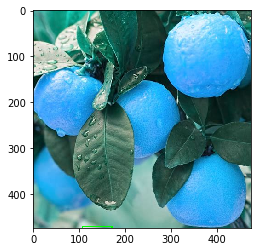

In [3]:
list=(glob.glob("*.jpg"))
counter=0
for i in list:
    counter=count_oranges(i,counter)
counter=0